# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np

import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.misc import imread

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (10, 20)

In [34]:
import pickle

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('geo_comment.xlsx')

In [4]:
data.head()

x          y  comment_class  multiplier  \
0  37.612416  55.777454             -1           1   
1  37.612416  55.777454             -1           1   
2  37.603298  55.742108             -1           1   
3  37.558526  55.728758             -1           1   
4  37.566431  55.731794             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
1  На основании вступившего в законную силу судеб...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...

In [7]:
alt_data = pd.read_excel('geo.xlsx')

In [8]:
alt_data.describe()

x              y  comment_class
count  108806.000000  108806.000000  108806.000000
mean       37.567532      55.766346      -0.748929
std         0.121996       0.069622       0.662653
min        37.148813      55.496939      -1.000000
25%        37.454528      55.729797      -1.000000
50%        37.559640      55.764734      -1.000000
75%        37.684784      55.806869      -1.000000
max        37.931228      55.994174       1.000000

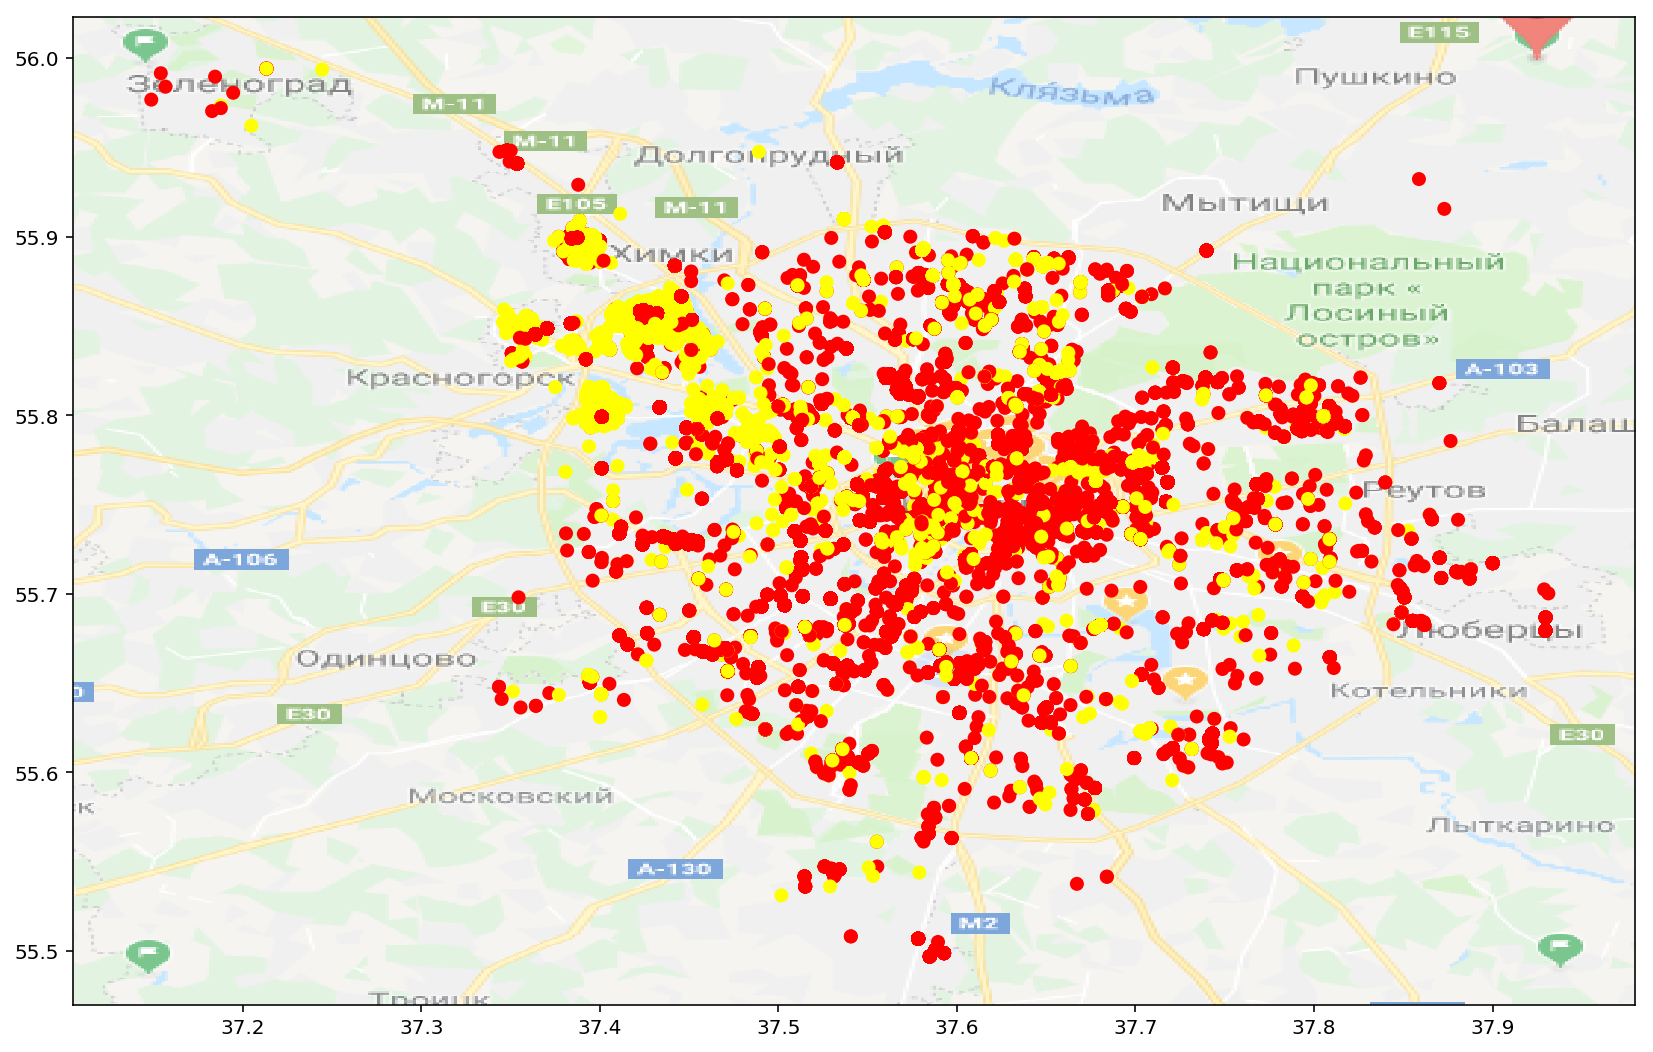

In [54]:
# посмотрим как располагаются голоса
plt.scatter(alt_data['x'],alt_data['y'], c=alt_data['comment_class'], cmap='autumn', zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

In [8]:
from sklearn.cluster import KMeans

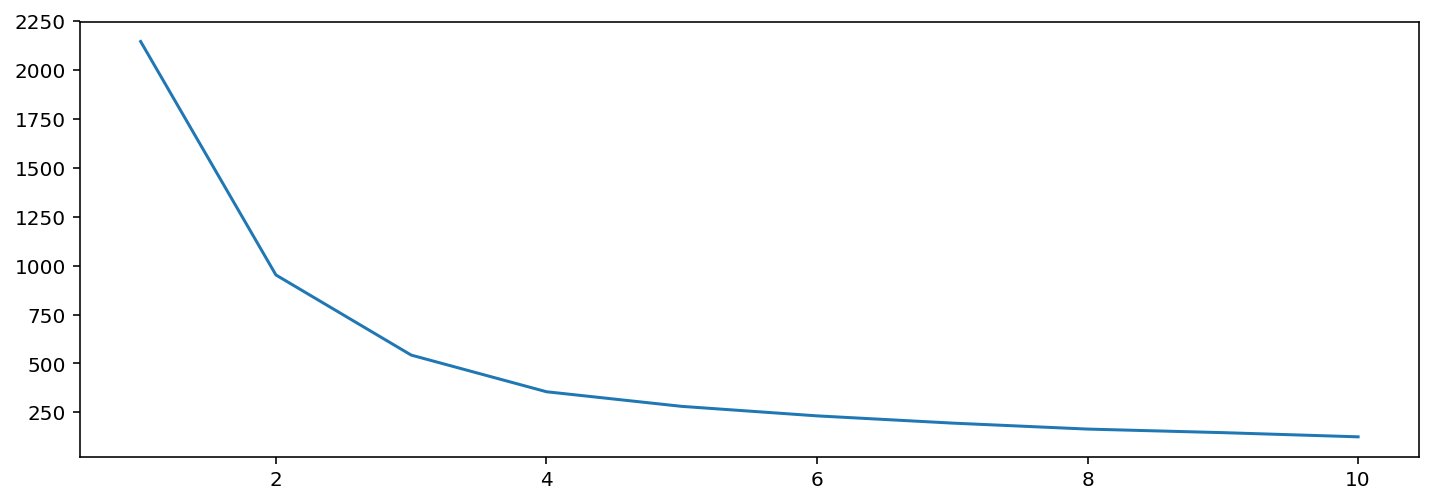

In [55]:
k_inertia = []
ks = range(1,11)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(alt_data[['x','y']] )
    k_inertia.append(clf_kmeans.inertia_)
matplotlib.rcParams['figure.figsize'] = (12, 4)
plt.plot(ks, k_inertia)    

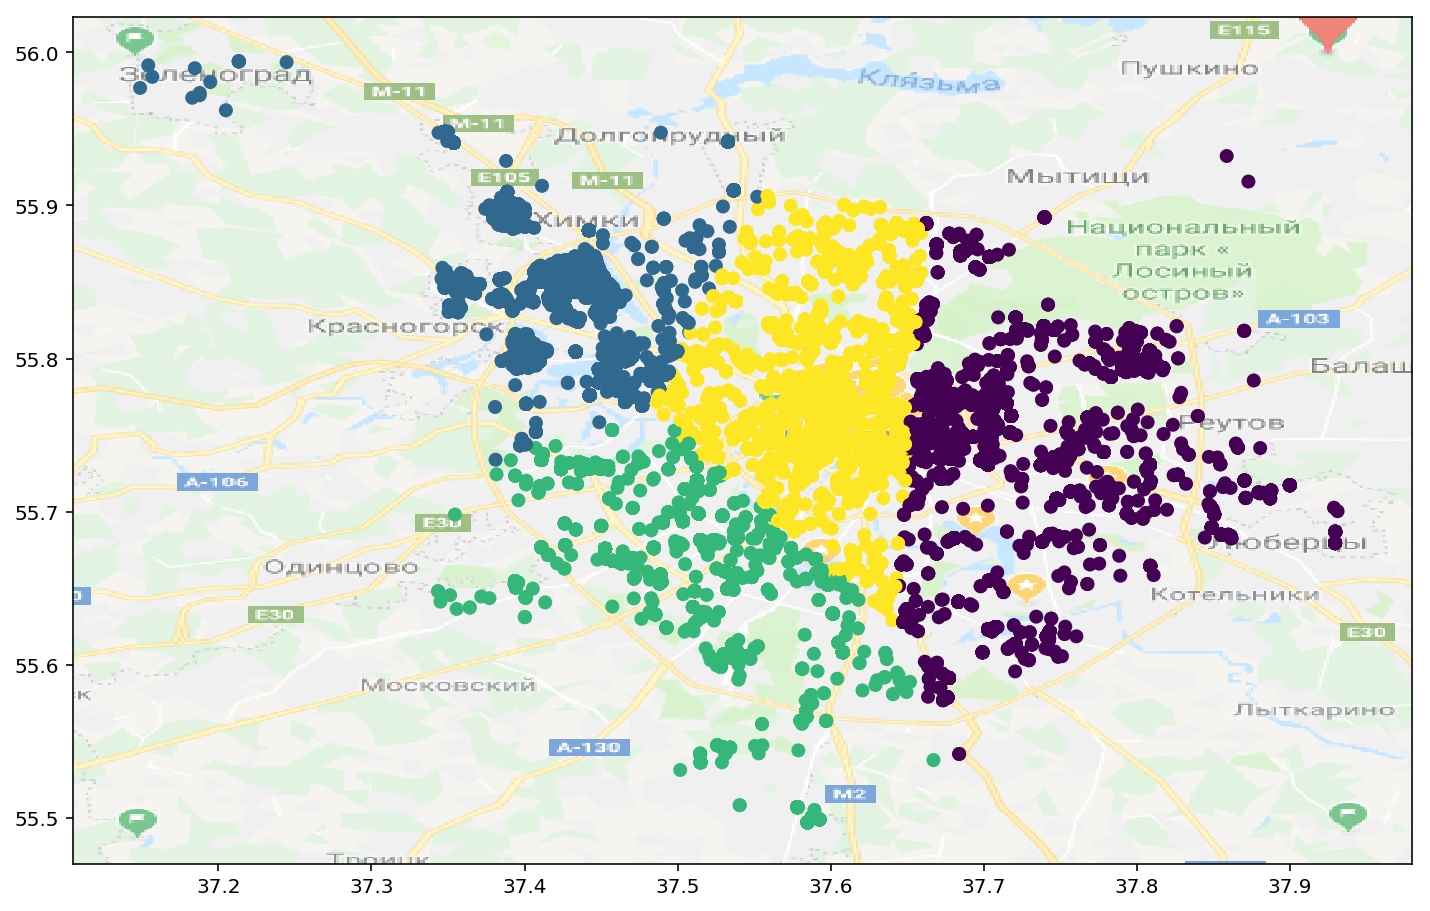

In [59]:
# Построим 4 кластера
matplotlib.rcParams['figure.figsize'] = (12, 8)
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=4)
cls.fit(alt_data[['x','y']])
alt_data['label_kmeans'] = cls.labels_
plt.scatter(alt_data['x'],alt_data['y'], c=alt_data['label_kmeans'],  zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

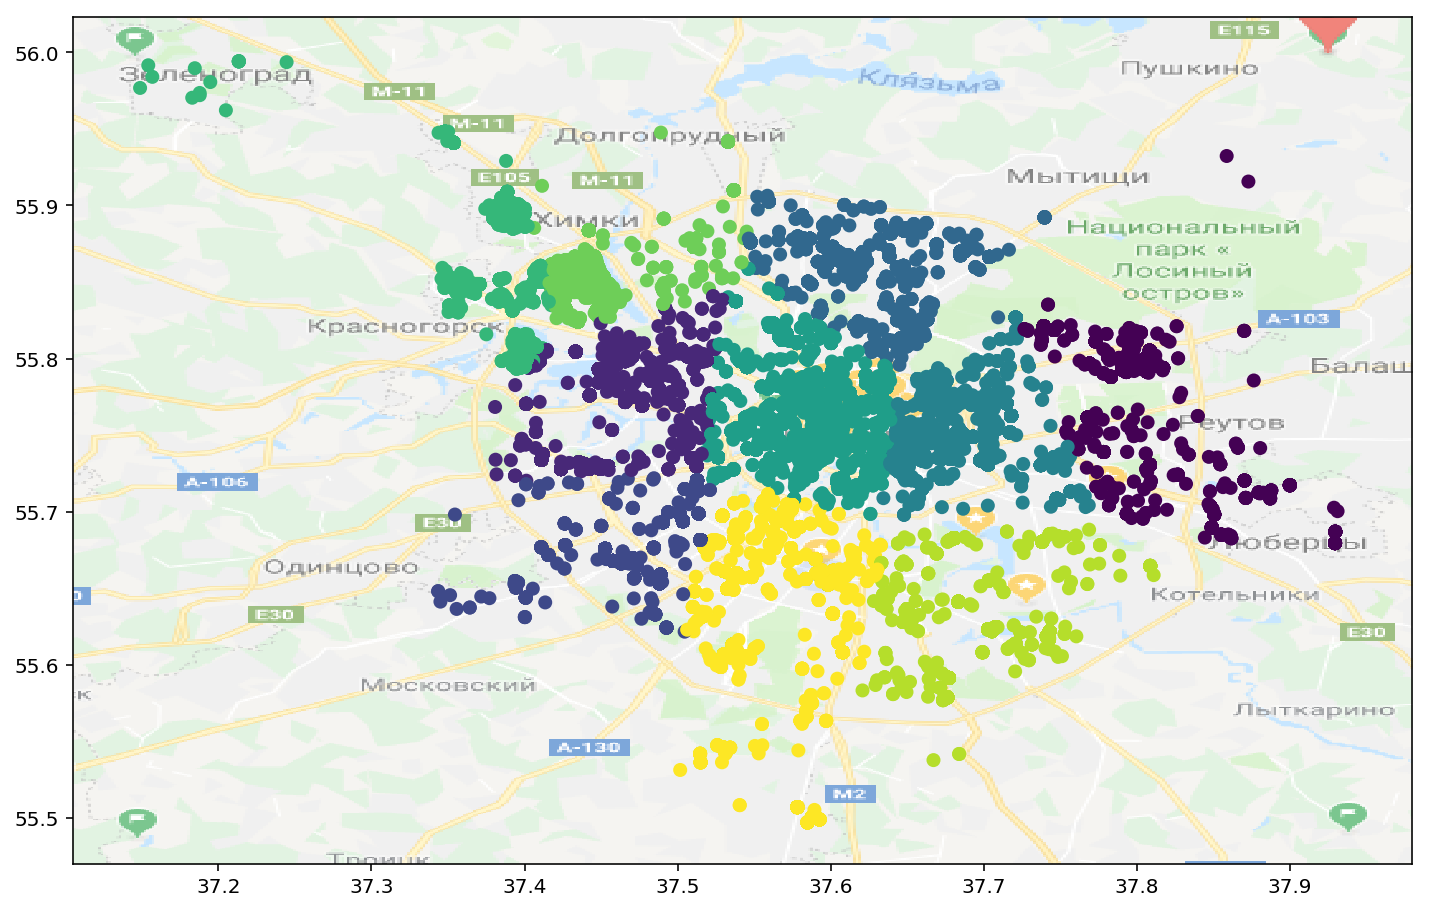

In [83]:
# Построим 10 кластеров (10 штук показалось самым удачным) 
matplotlib.rcParams['figure.figsize'] = (12, 8)
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=10)
cls.fit(alt_data[['x','y']])
alt_data['label_kmeans'] = cls.labels_
plt.scatter(alt_data['x'],alt_data['y'], c=alt_data['label_kmeans'],  zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

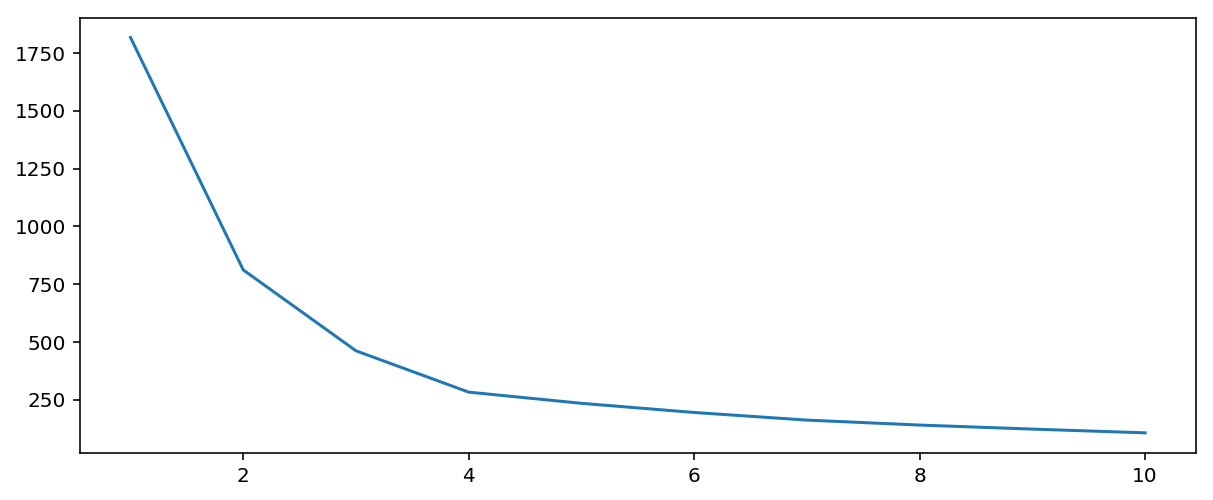

In [75]:
# Проверим различное количество кластеров для отрицательных отзывов
k_inertia = []
ks = range(1,11)
alt_data_1 = alt_data[alt_data['comment_class']==-1]
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(alt_data_1[['x','y']] )
    k_inertia.append(clf_kmeans.inertia_)
    
matplotlib.rcParams['figure.figsize'] = (10, 4)
plt.plot(ks, k_inertia)  

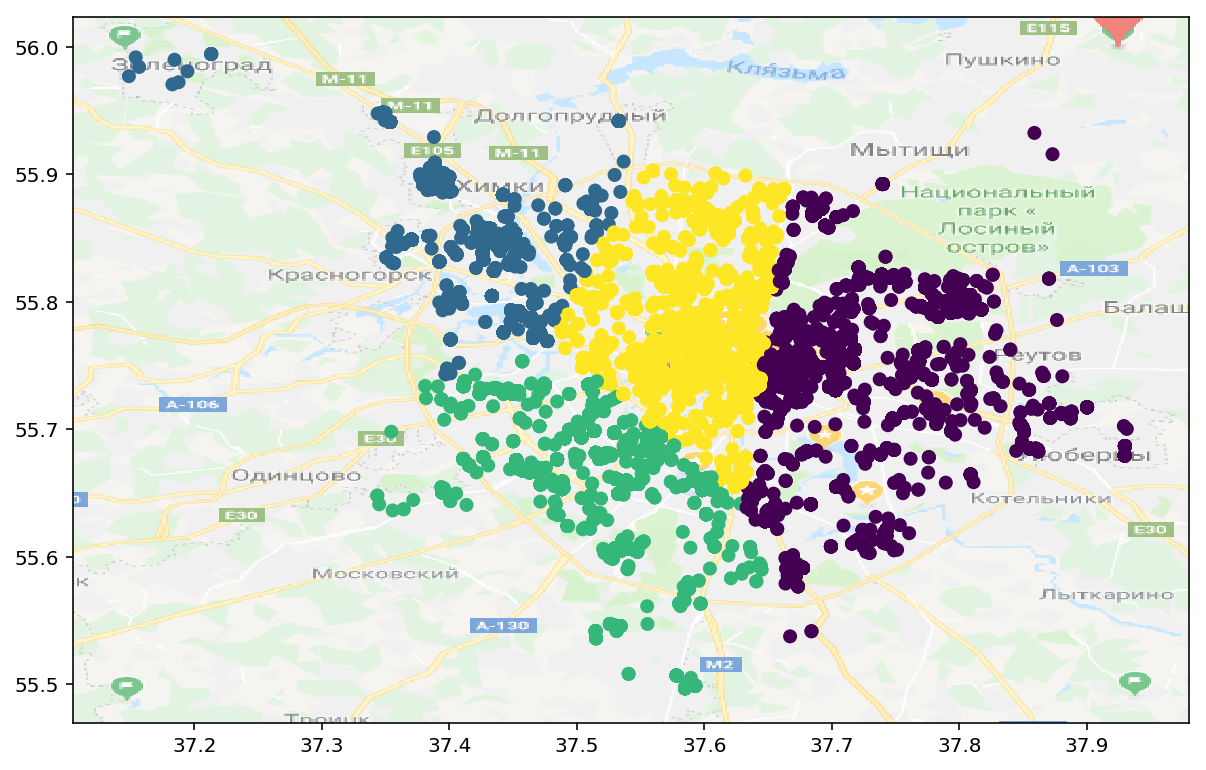

In [76]:
# Построим 4 кластера 
matplotlib.rcParams['figure.figsize'] = (10, 8)
cls = KMeans(n_clusters=4)
cls.fit(alt_data_1[['x','y']])
alt_data_1['label_kmeans'] = cls.labels_
plt.scatter(alt_data_1['x'],alt_data_1['y'], c=alt_data_1['label_kmeans'],  zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

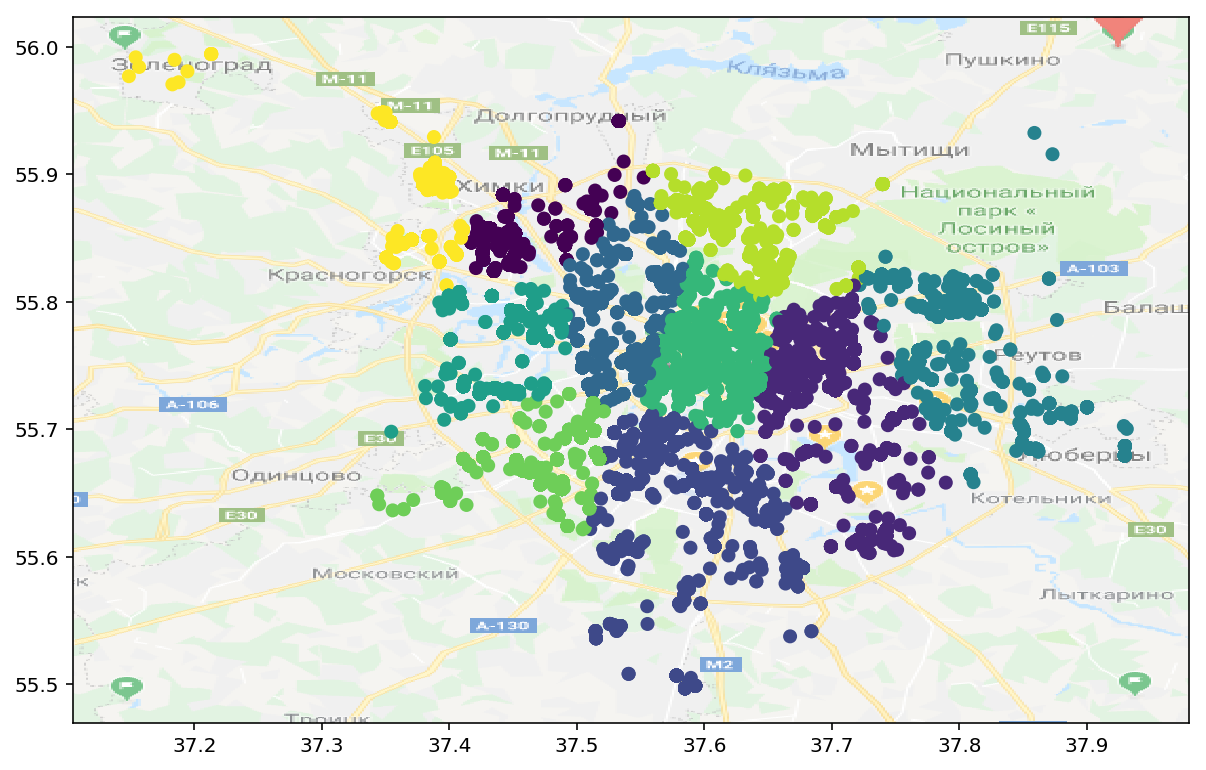

In [77]:
# Построим 10 кластеров 
matplotlib.rcParams['figure.figsize'] = (10, 8)
cls = KMeans(n_clusters=10)
cls.fit(alt_data_1[['x','y']])
alt_data_1['label_kmeans'] = cls.labels_
plt.scatter(alt_data_1['x'],alt_data_1['y'], c=alt_data_1['label_kmeans'],  zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

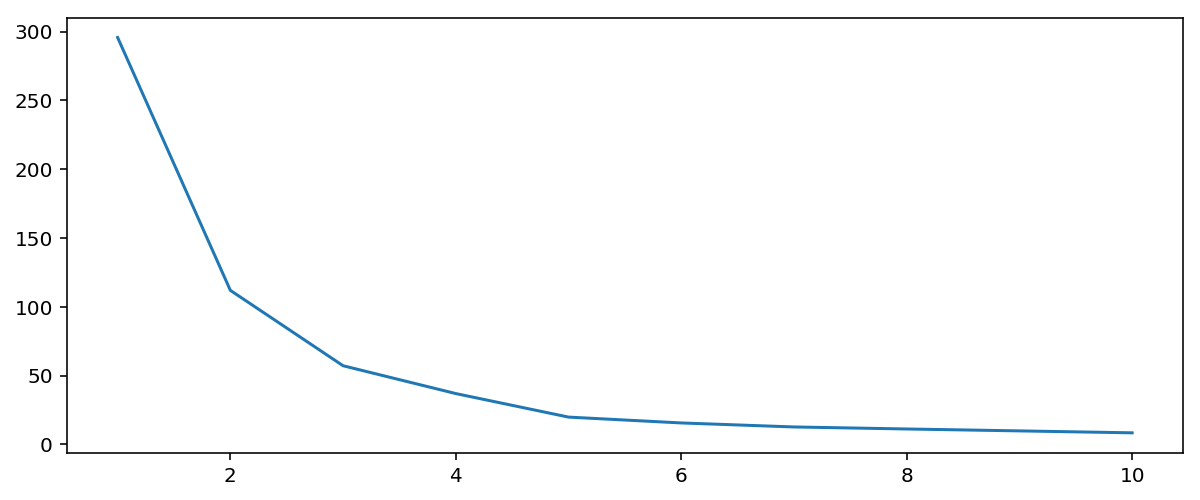

In [78]:
# Проверим различное количество кластеров для отрицательных отзывов
k_inertia = []
ks = range(1,11)
alt_data_1 = alt_data[alt_data['comment_class']==1]
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(alt_data_1[['x','y']] )
    k_inertia.append(clf_kmeans.inertia_)
    
matplotlib.rcParams['figure.figsize'] = (10, 4)
plt.plot(ks, k_inertia)  

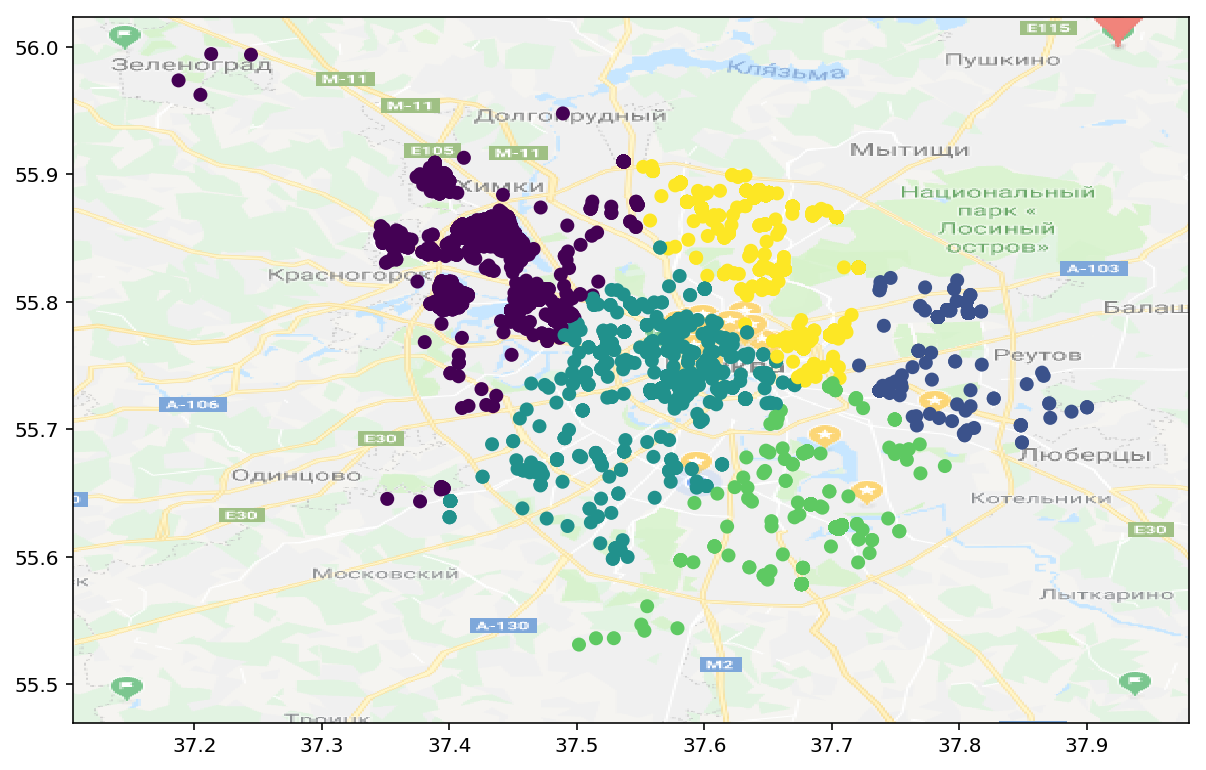

In [79]:
# Построим 5 кластеров
matplotlib.rcParams['figure.figsize'] = (10, 8)
cls = KMeans(n_clusters=5)
cls.fit(alt_data_1[['x','y']])
alt_data_1['label_kmeans'] = cls.labels_
plt.scatter(alt_data_1['x'],alt_data_1['y'], c=alt_data_1['label_kmeans'],  zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

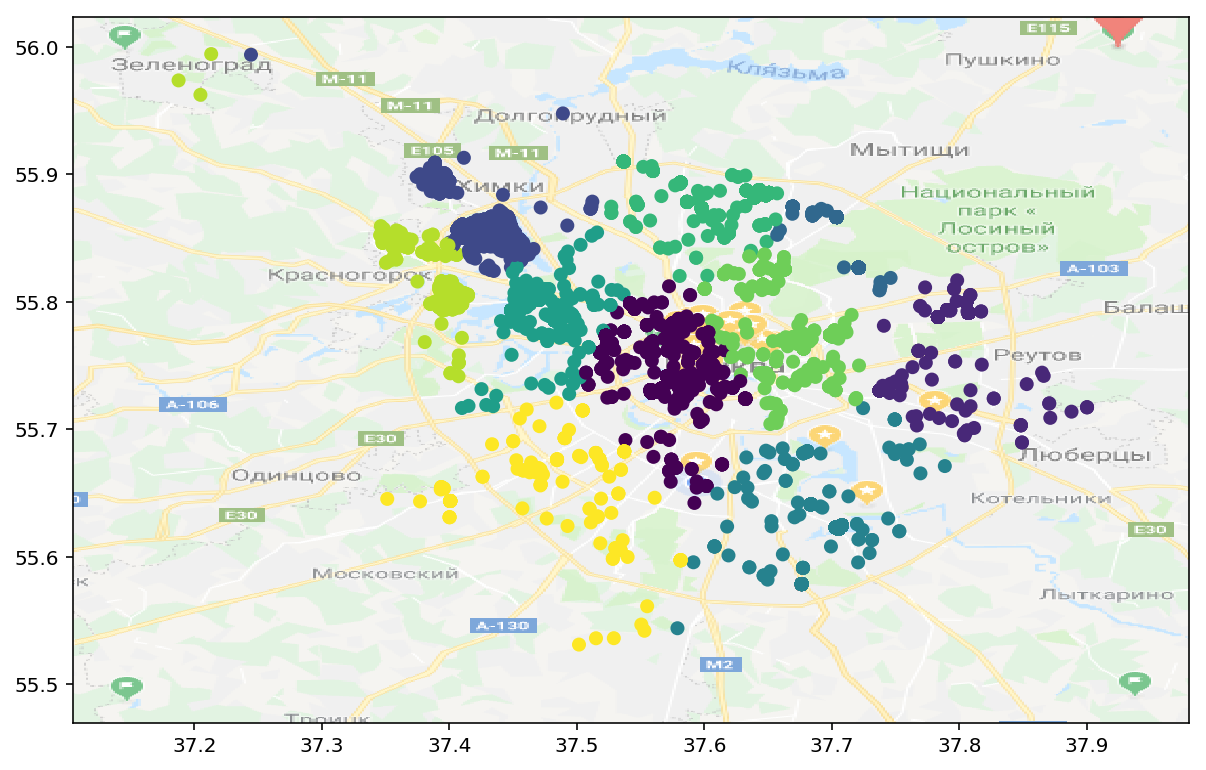

In [80]:
# Построим 10 кластеров
matplotlib.rcParams['figure.figsize'] = (10, 8)
cls = KMeans(n_clusters=10)
cls.fit(alt_data_1[['x','y']])
alt_data_1['label_kmeans'] = cls.labels_
plt.scatter(alt_data_1['x'],alt_data_1['y'], c=alt_data_1['label_kmeans'],  zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

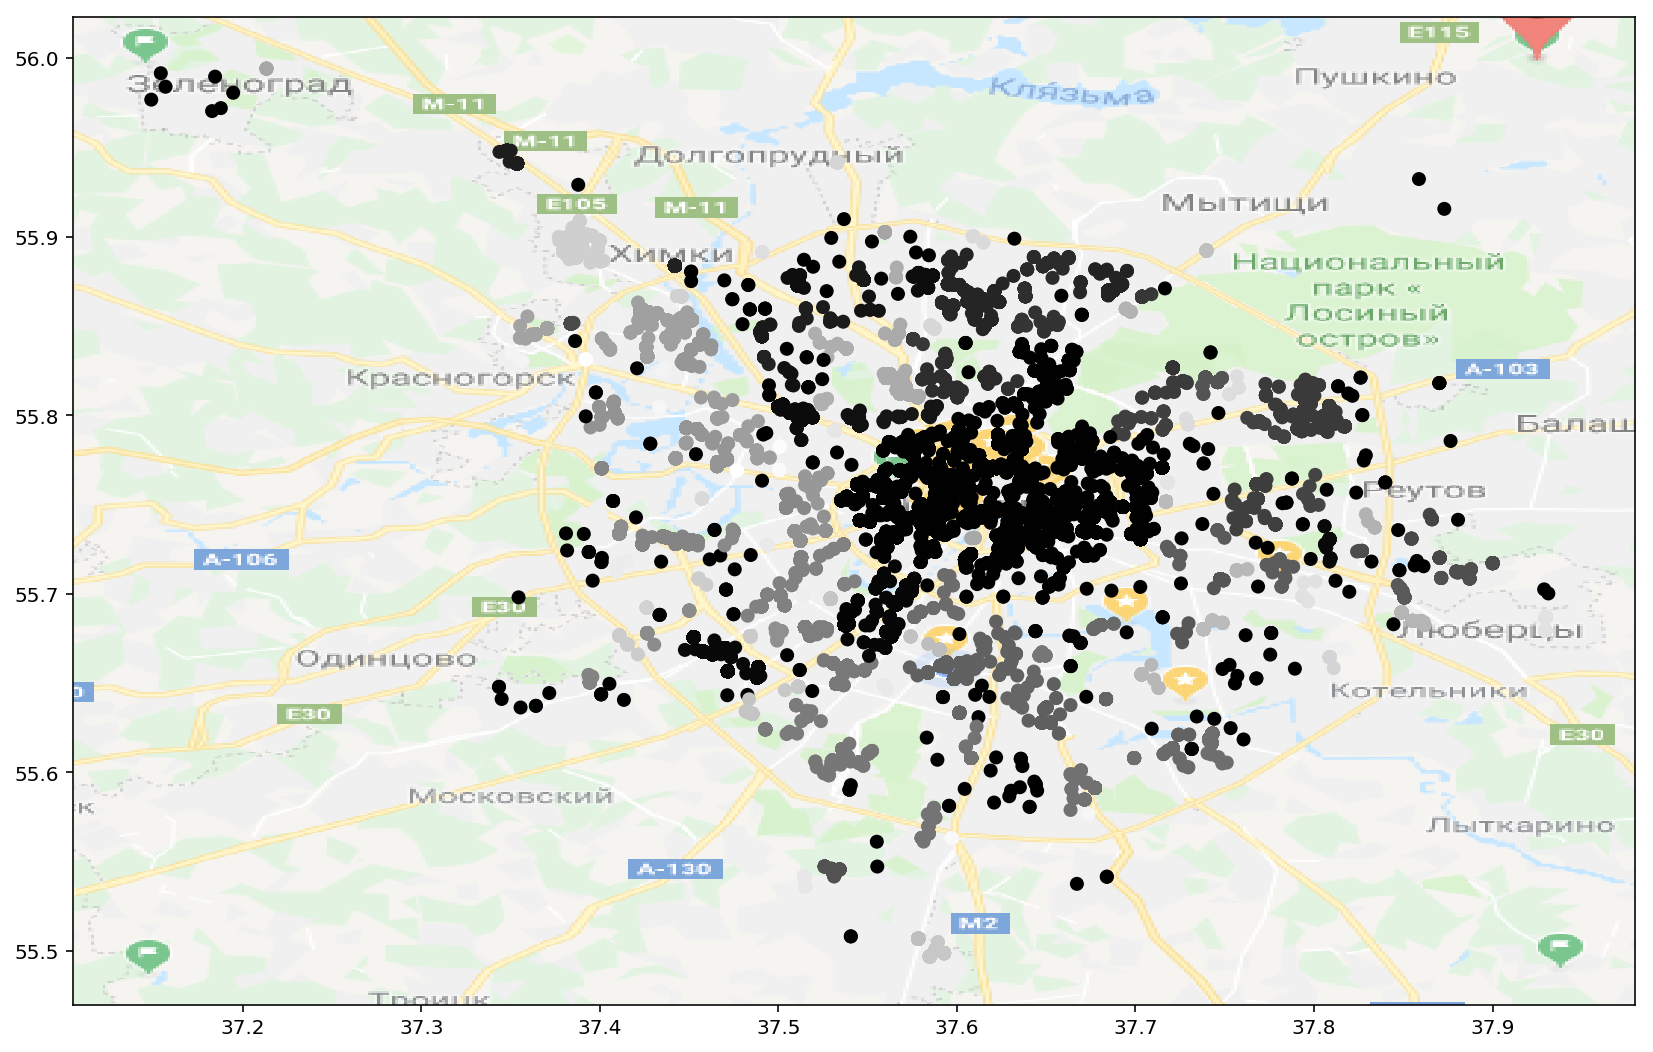

In [84]:
# Построим кластеры с помощью алгоритма DBSCAN  для отрицательных отзывов

matplotlib.rcParams['figure.figsize'] = (14, 12)
cls = DBSCAN(eps=0.008)
alt_data_1 = alt_data[alt_data['comment_class']==-1]
cls.fit(alt_data_1[['x','y']])
alt_data_1['label_kmeans'] = cls.labels_
plt.scatter(alt_data_1['x'],alt_data_1['y'], c=alt_data_1['label_kmeans'], cmap='gray', zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

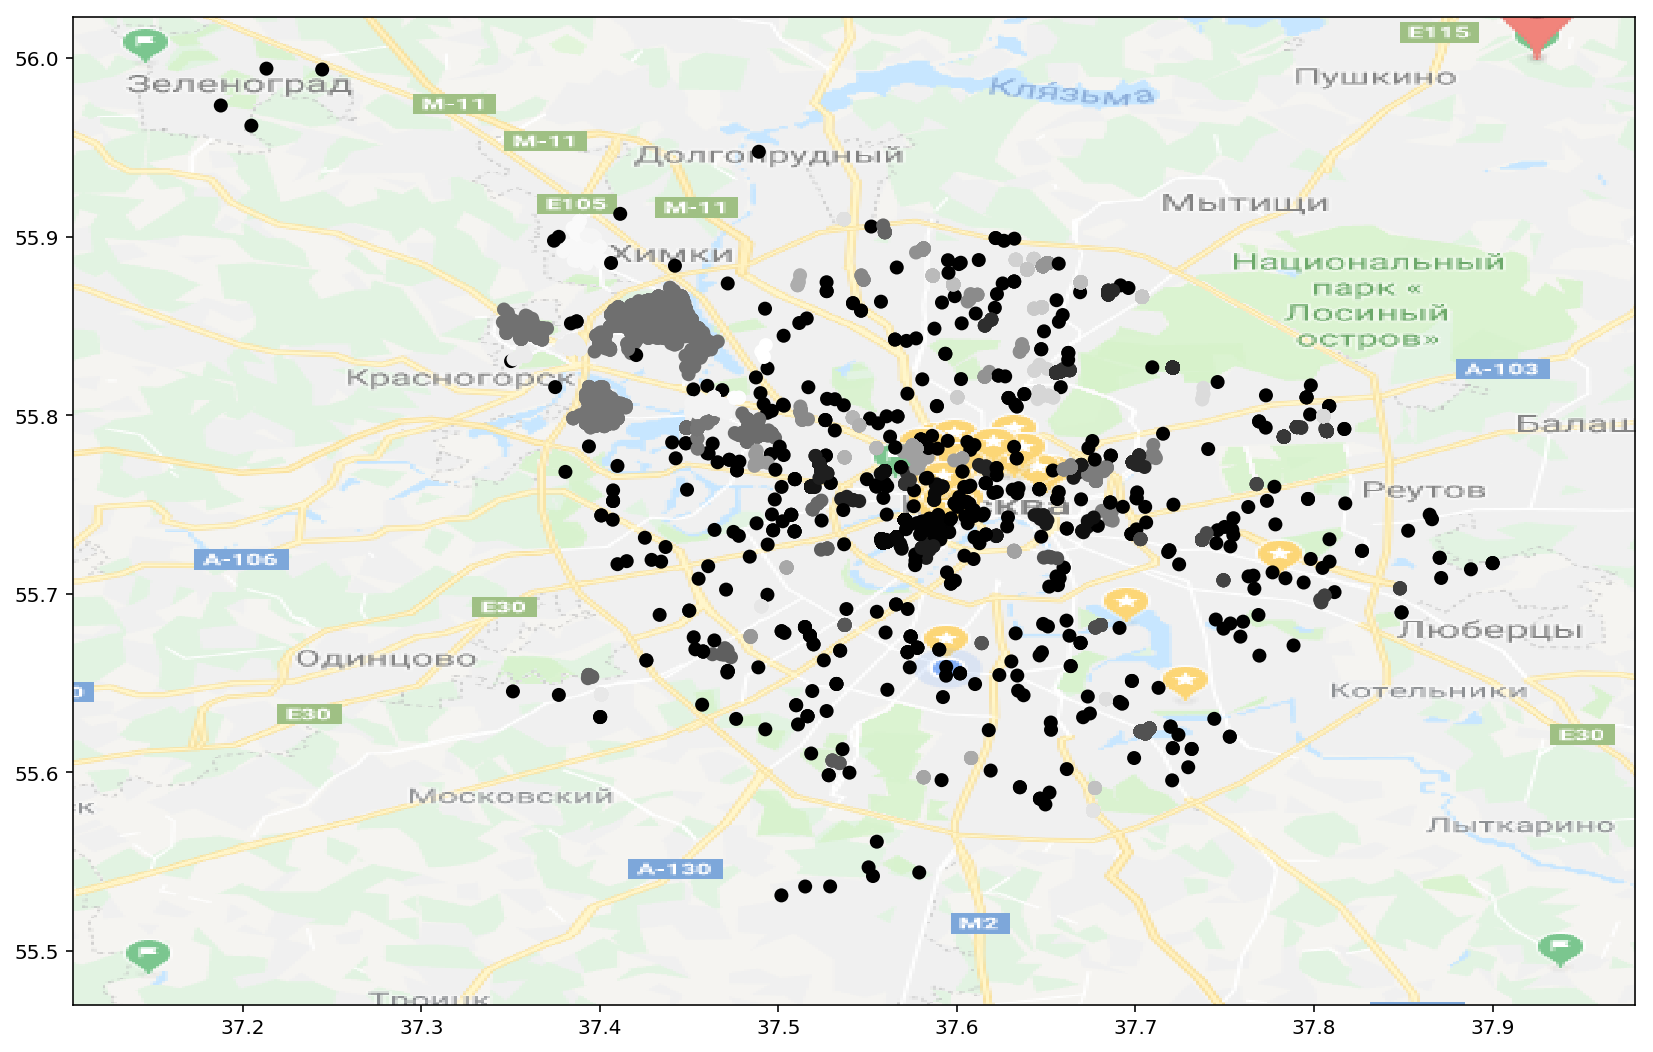

In [85]:
# Построим кластеры с помощью алгоритма DBSCAN  для положительных отзывов
matplotlib.rcParams['figure.figsize'] = (14, 12)
cls = DBSCAN(eps=0.005)
alt_data_1 = alt_data[alt_data['comment_class']==1]
cls.fit(alt_data_1[['x','y']])
alt_data_1['label_kmeans'] = cls.labels_
plt.scatter(alt_data_1['x'],alt_data_1['y'], c=alt_data_1['label_kmeans'],cmap='gray',  zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

In [ ]:
# Видно, что есть плотные кластеры как для положительных так и для отрицательных отзывов

In [12]:
data.head()

x          y  comment_class  multiplier  \
0  37.612416  55.777454             -1           1   
1  37.612416  55.777454             -1           1   
2  37.603298  55.742108             -1           1   
3  37.558526  55.728758             -1           1   
4  37.566431  55.731794             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
1  На основании вступившего в законную силу судеб...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...

In [22]:
dict_data_good = {}
dict_data_bad = {}
for i,e in data.iterrows():
    if e['comment_class'] == 1:
        dict_data_good[i] = e['comment']
    else:
        dict_data_bad[i] = e['comment']

In [23]:
from bs4 import BeautifulSoup
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from pymorphy2 import MorphAnalyzer

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
chrs_to_delete = string.punctuation + u'»' + u'«' + u'—' + u'“' + u'„' + u'•' + u'#'
translation_table = {ord(c): None for c in chrs_to_delete if c != u'-'}
units = MorphAnalyzer.DEFAULT_UNITS
morph = MorphAnalyzer(result_type=None, units=units)
PortSt = PorterStemmer()

In [26]:
stopw = set([w for w in stopwords.words(['russian', 'english'])])

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
clean_dict_data_good = {}
counter = 0

for i, doc in dict_data_good.items():
    if doc != '':
        doc_clean = doc.translate(translation_table).lower().strip()
        words = word_tokenize(doc_clean)
        tokens = []
        # stemming and text normalization
        for word in words:
            if re.match('^[a-z0-9-]+$', word) is not None:
                tokens.append(PortSt.stem(word))
            elif word.count('-') > 1:
                tokens.append(word)
            else:
                normal_forms = morph.normal_forms(word)
                tokens.append(normal_forms[0] if normal_forms else word)
        # remove stopwords and leave unique words only
        tokens = filter(
            lambda token: token not in stopw, sorted(set(tokens))
        )

        # remove all words with more than 3 chars
        tokens = filter(lambda token: len(token) > 3, tokens)
    else:
        tokens = []
    counter += 1
    if counter % 1000 == 0:
        print("{0} docs processed".format(counter))
    clean_dict_data_good[i] = tokens

clean_dict_data_good = {key: list(val) for key, val in clean_dict_data_good.items()}

1000 docs processed
2000 docs processed
3000 docs processed
4000 docs processed
5000 docs processed
6000 docs processed
7000 docs processed
8000 docs processed
9000 docs processed
10000 docs processed
11000 docs processed


In [32]:
clean_dict_data_bad = {}
counter = 0

for i, doc in dict_data_bad.items():
    if doc != '':
        doc_clean = doc.translate(translation_table).lower().strip()
        words = word_tokenize(doc_clean)
        tokens = []
        # stemming and text normalization
        for word in words:
            if re.match('^[a-z0-9-]+$', word) is not None:
                tokens.append(PortSt.stem(word))
            elif word.count('-') > 1:
                tokens.append(word)
            else:
                normal_forms = morph.normal_forms(word)
                tokens.append(normal_forms[0] if normal_forms else word)
        # remove stopwords and leave unique words only
        tokens = filter(
            lambda token: token not in stopw, sorted(set(tokens))
        )

        # remove all words with more than 3 chars
        tokens = filter(lambda token: len(token) > 3, tokens)
    else:
        tokens = []
    counter += 1
    if counter % 1000 == 0:
        print("{0} docs processed".format(counter))
    clean_dict_data_bad[i] = tokens

clean_dict_data_bad = {key: list(val) for key, val in clean_dict_data_bad.items()}

1000 docs processed
2000 docs processed
3000 docs processed
4000 docs processed
5000 docs processed
6000 docs processed
7000 docs processed
8000 docs processed
9000 docs processed
10000 docs processed
11000 docs processed
12000 docs processed
13000 docs processed
14000 docs processed
15000 docs processed
16000 docs processed
17000 docs processed
18000 docs processed
19000 docs processed
20000 docs processed
21000 docs processed
22000 docs processed
23000 docs processed
24000 docs processed
25000 docs processed
26000 docs processed
27000 docs processed
28000 docs processed
29000 docs processed
30000 docs processed
31000 docs processed
32000 docs processed
33000 docs processed
34000 docs processed
35000 docs processed
36000 docs processed
37000 docs processed
38000 docs processed
39000 docs processed
40000 docs processed
41000 docs processed
42000 docs processed
43000 docs processed
44000 docs processed
45000 docs processed
46000 docs processed
47000 docs processed
48000 docs processed
4

In [35]:
save_obj(clean_dict_data_bad, 'clean_dict_data_bad')
save_obj(clean_dict_data_good, 'clean_dict_data_good')


In [36]:
from gensim.corpora import TextCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.ldamodel import LdaModel


In [49]:
class ListTextCorpus(TextCorpus):
    def get_texts(self):
        for doc in self.input:
            yield doc
                
mycorp_good = ListTextCorpus(input=clean_dict_data_good.values())
justlda_good = LdaModel(
    corpus=mycorp_good, num_topics=14, passes=12
)

mycorp_bad = ListTextCorpus(input=clean_dict_data_bad.values())
justlda_bad = LdaModel(
    corpus=mycorp_bad, num_topics=12, passes=12
)



In [50]:
print('LdaModel good performance')
for i in range(14):
    terms = justlda_good.get_topic_terms(i)
    print(i, ' '.join(map(lambda x: mycorp_good.dictionary.get(x[0]), terms)))
print('LdaModel bad performance')
for i in range(12):
    terms = justlda_bad.get_topic_terms(i)
    print(i, ' '.join(map(lambda x: mycorp_bad.dictionary.get(x[0]), terms)))

LdaModel good performance
0 интересный измайловский замечание владимир книга округа право рязанский далее федеральный
1 дать объект строительство большой территория решение новое город обсуждать новый
2 проект адрес проживать далее поддерживать ознакомиться застройка землепользование правило москва
3 объект важный район развитие адрес поликлиника борис работать застройка очень
4 жилой земельный участок кадастровый застройка зона адрес номер центр развитие
5 значимый живописный хотеть пятницкий саввинский фрунзенский нравиться 1-ый набережная поддерживать
6 бульвар поддержать 3000 класс благоустройство поддерживать образование полностью размещение план
7 адрес проживать проект далее москва замечание полностью поддерживать весь целое
8 включить разрешить тысяча обслуживание правило просить землепользование жила использование участок
9 застройка являться участок проект публичный слушание земельный соответствие параметр правило
10 предложение замечание центр существующий шоссе экологически

In [51]:
# dump lda model to disk
justlda_good.save('ldamodel_good_20_topics')
justlda_bad.save('ldamodel_bad_20_topics')

In [63]:
# добавим отзывам номер топика
justlda_good.get_topic_terms(2)


[(91, 0.08285892),
 (0, 0.07685538),
 (122, 0.070392944),
 (222, 0.057311196),
 (191, 0.051361885),
 (242, 0.042775817),
 (3, 0.039086904),
 (330, 0.036981806),
 (336, 0.035401694),
 (8, 0.029455155)]

In [141]:
dummy_dict_goot = {key: 0 for key in range(14)}

group_topics_dict_14 = {
    group_id: dict(list(dummy_dict_goot.items()) + justlda_good.get_document_topics(mycorp_good.dictionary.doc2bow(text)))
    for group_id, text in clean_dict_data_good.items()
}
check_pd_good_14 = pd.DataFrame.from_dict(group_topics_dict_14, orient='index')
check_pd_good_14.head(10)

0         1         2    3         4    5    6    7    8         9    10  \
28  0.0  0.299984  0.237291  0.0  0.299644  0.0  0.0  0.0  0.0  0.129068  0.0   
45  0.0  0.000000  0.000000  0.0  0.820668  0.0  0.0  0.0  0.0  0.000000  0.0   
46  0.0  0.000000  0.000000  0.0  0.820660  0.0  0.0  0.0  0.0  0.000000  0.0   
47  0.0  0.000000  0.000000  0.0  0.820659  0.0  0.0  0.0  0.0  0.000000  0.0   
61  0.0  0.000000  0.000000  0.0  0.820663  0.0  0.0  0.0  0.0  0.000000  0.0   
62  0.0  0.000000  0.000000  0.0  0.820660  0.0  0.0  0.0  0.0  0.000000  0.0   
63  0.0  0.000000  0.000000  0.0  0.820660  0.0  0.0  0.0  0.0  0.000000  0.0   
64  0.0  0.000000  0.000000  0.0  0.806666  0.0  0.0  0.0  0.0  0.000000  0.0   
65  0.0  0.000000  0.000000  0.0  0.806667  0.0  0.0  0.0  0.0  0.000000  0.0   
66  0.0  0.000000  0.000000  0.0  0.806668  0.0  0.0  0.0  0.0  0.000000  0.0   

     11   12        13  
28  0.0  0.0  0.000000  
45  0.0  0.0  0.162189  
46  0.0  0.0  0.162197  
47  0.0  0.0  0.162198  
61  0.0  0.0  0.162194  
62  0.0  0.0  0.162198  
63  0.0  0.0  0.162197  
64  0.0  0.0  0.176851  
65  0.0  0.0  0.176849  
66  0.0  0.0  0.176848

In [140]:
dummy_dict_bad = {key: 0 for key in range(12)}

group_topics_dict_12 = {
    group_id: dict(list(dummy_dict_bad.items()) + justlda_bad.get_document_topics(mycorp_bad.dictionary.doc2bow(text)))
    for group_id, text in clean_dict_data_bad.items()
}
check_pd_bad_12 = pd.DataFrame.from_dict(group_topics_dict_12, orient='index')

check_pd_bad_12.head(10)



0    1         2         3         4         5         6         7   \
0  0.000000  0.0  0.081173  0.000000  0.030380  0.183814  0.000000  0.000000   
1  0.000000  0.0  0.106992  0.000000  0.113476  0.264801  0.000000  0.000000   
2  0.000000  0.0  0.174255  0.000000  0.442508  0.069778  0.000000  0.000000   
3  0.000000  0.0  0.230493  0.030091  0.580997  0.000000  0.068845  0.039378   
4  0.000000  0.0  0.230496  0.030091  0.580998  0.000000  0.068841  0.039378   
5  0.000000  0.0  0.193661  0.033235  0.698283  0.000000  0.000000  0.055213   
6  0.000000  0.0  0.193663  0.033235  0.698298  0.000000  0.000000  0.055197   
7  0.090141  0.0  0.362137  0.000000  0.093942  0.087658  0.000000  0.080218   
8  0.070435  0.0  0.367203  0.137593  0.099030  0.194722  0.000000  0.104700   
9  0.000000  0.0  0.000000  0.000000  0.544771  0.000000  0.238239  0.120291   

         8         9         10        11  
0  0.029069  0.072623  0.427194  0.170604  
1  0.118880  0.101841  0.000000  0.284205  
2  0.041543  0.047129  0.000000  0.214583  
3  0.037037  0.000000  0.000000  0.000000  
4  0.037037  0.000000  0.000000  0.000000  
5  0.000000  0.000000  0.000000  0.000000  
6  0.000000  0.000000  0.000000  0.000000  
7  0.126811  0.000000  0.000000  0.143659  
8  0.000000  0.000000  0.000000  0.000000  
9  0.000000  0.063364  0.000000  0.000000

In [142]:
check_pd_bad_12[12] = 0.0
check_pd_bad_12[13] = 0.0

In [143]:
check_pd_bad_12.iloc[0].sort_values(ascending=False).keys()[0]

10

In [144]:
check_pd_bad_12['max'] = check_pd_bad_12.apply(lambda x: x.sort_values(ascending=False).keys()[0], axis=1)

In [145]:
check_pd_goot_14['max'] = check_pd_goot_14.apply(lambda x: x.sort_values(ascending=False).keys()[0], axis=1)

In [157]:
check_pd_goot_14.head()

0         1         2    3         4    5    6    7    8         9   10  \
28  0.0  0.299977  0.237292  0.0  0.299638  0.0  0.0  0.0  0.0  0.129079  0.0   
45  0.0  0.000000  0.000000  0.0  0.820658  0.0  0.0  0.0  0.0  0.000000  0.0   
46  0.0  0.000000  0.000000  0.0  0.820657  0.0  0.0  0.0  0.0  0.000000  0.0   
47  0.0  0.000000  0.000000  0.0  0.820661  0.0  0.0  0.0  0.0  0.000000  0.0   
61  0.0  0.000000  0.000000  0.0  0.820659  0.0  0.0  0.0  0.0  0.000000  0.0   

     11   12        13  max  
28  0.0  0.0  0.000000    1  
45  0.0  0.0  0.162200    4  
46  0.0  0.0  0.162200    4  
47  0.0  0.0  0.162196    4  
61  0.0  0.0  0.162198    4

In [116]:
data['max'] = 0

In [161]:
data_good = data[data['comment_class']==1]
data_bad = data[data['comment_class']==-1]

In [163]:
data_good['max'] = check_pd_goot_14['max']
data_bad['max'] = check_pd_bad_12['max']

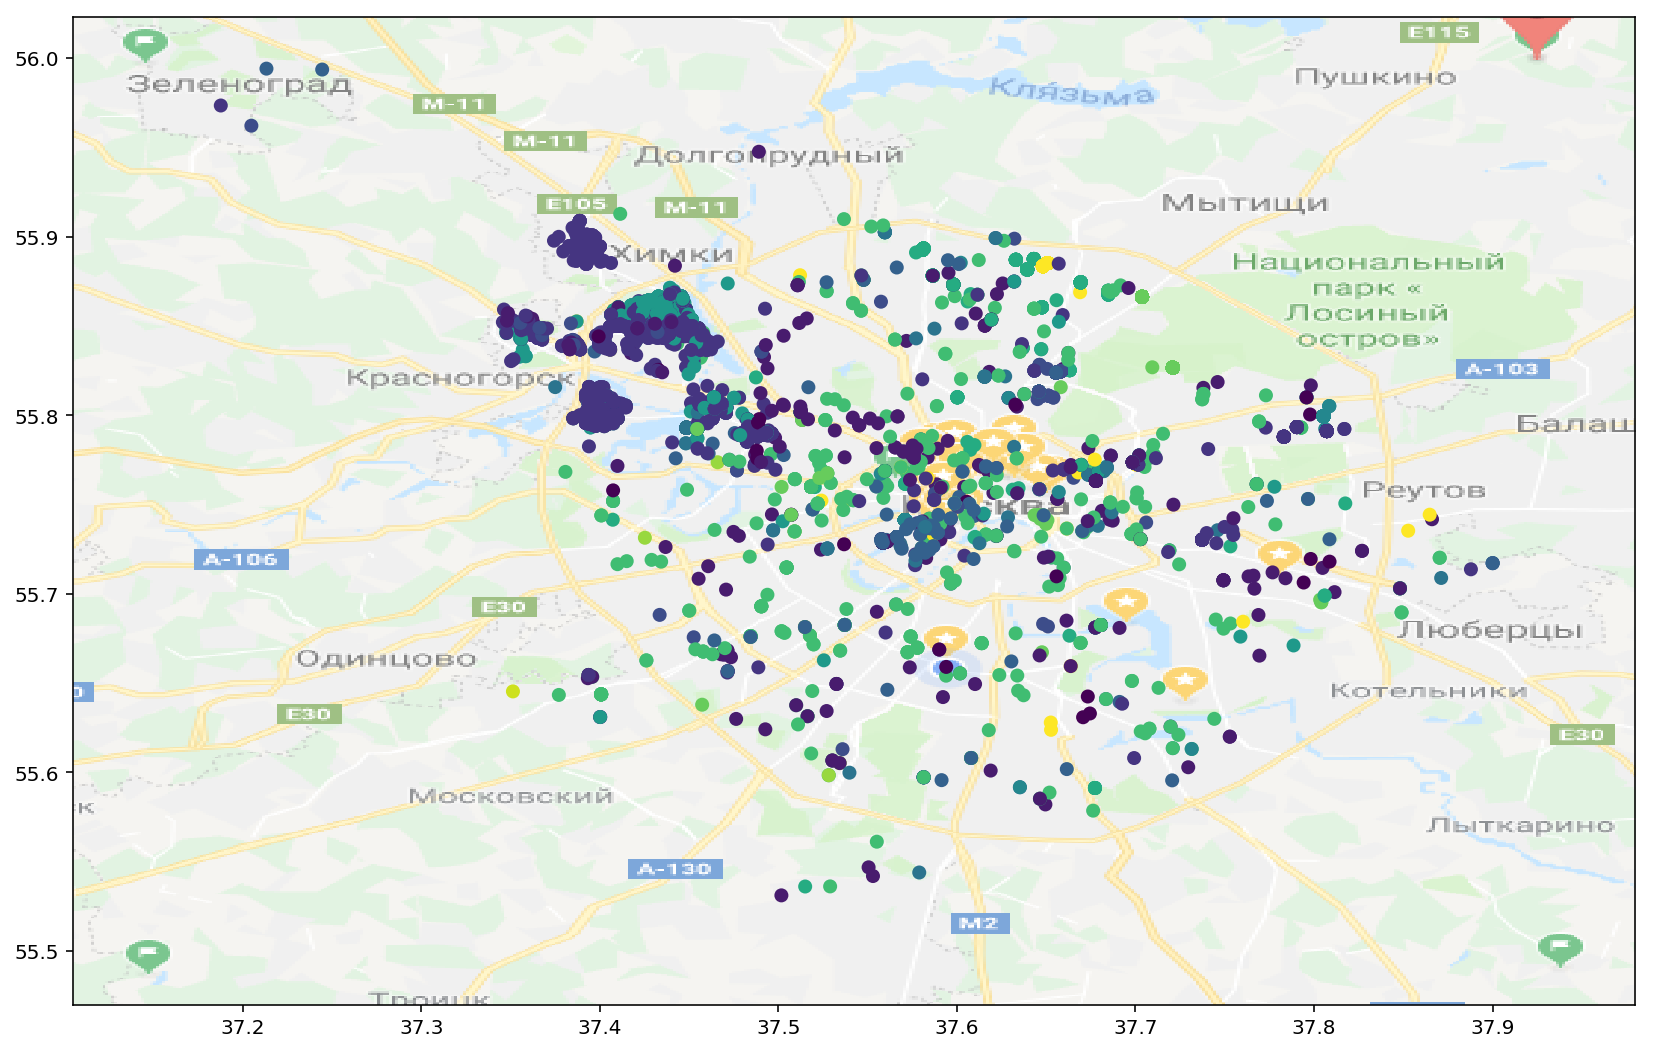

In [165]:

# Построим группы для положительных отзывов
matplotlib.rcParams['figure.figsize'] = (14, 12)
plt.scatter(data_good['x'],data_good['y'], c=data_good['max'],  zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

In [167]:
# Из полученных графика видно, что для хороших отзывов есть достаточно большие плотные кластеры по темам и 
# зоны с приемущественной темой отзыва
# особенно выделяются Митино и Красногорск, Строгино, Щюкино и Хамовники 

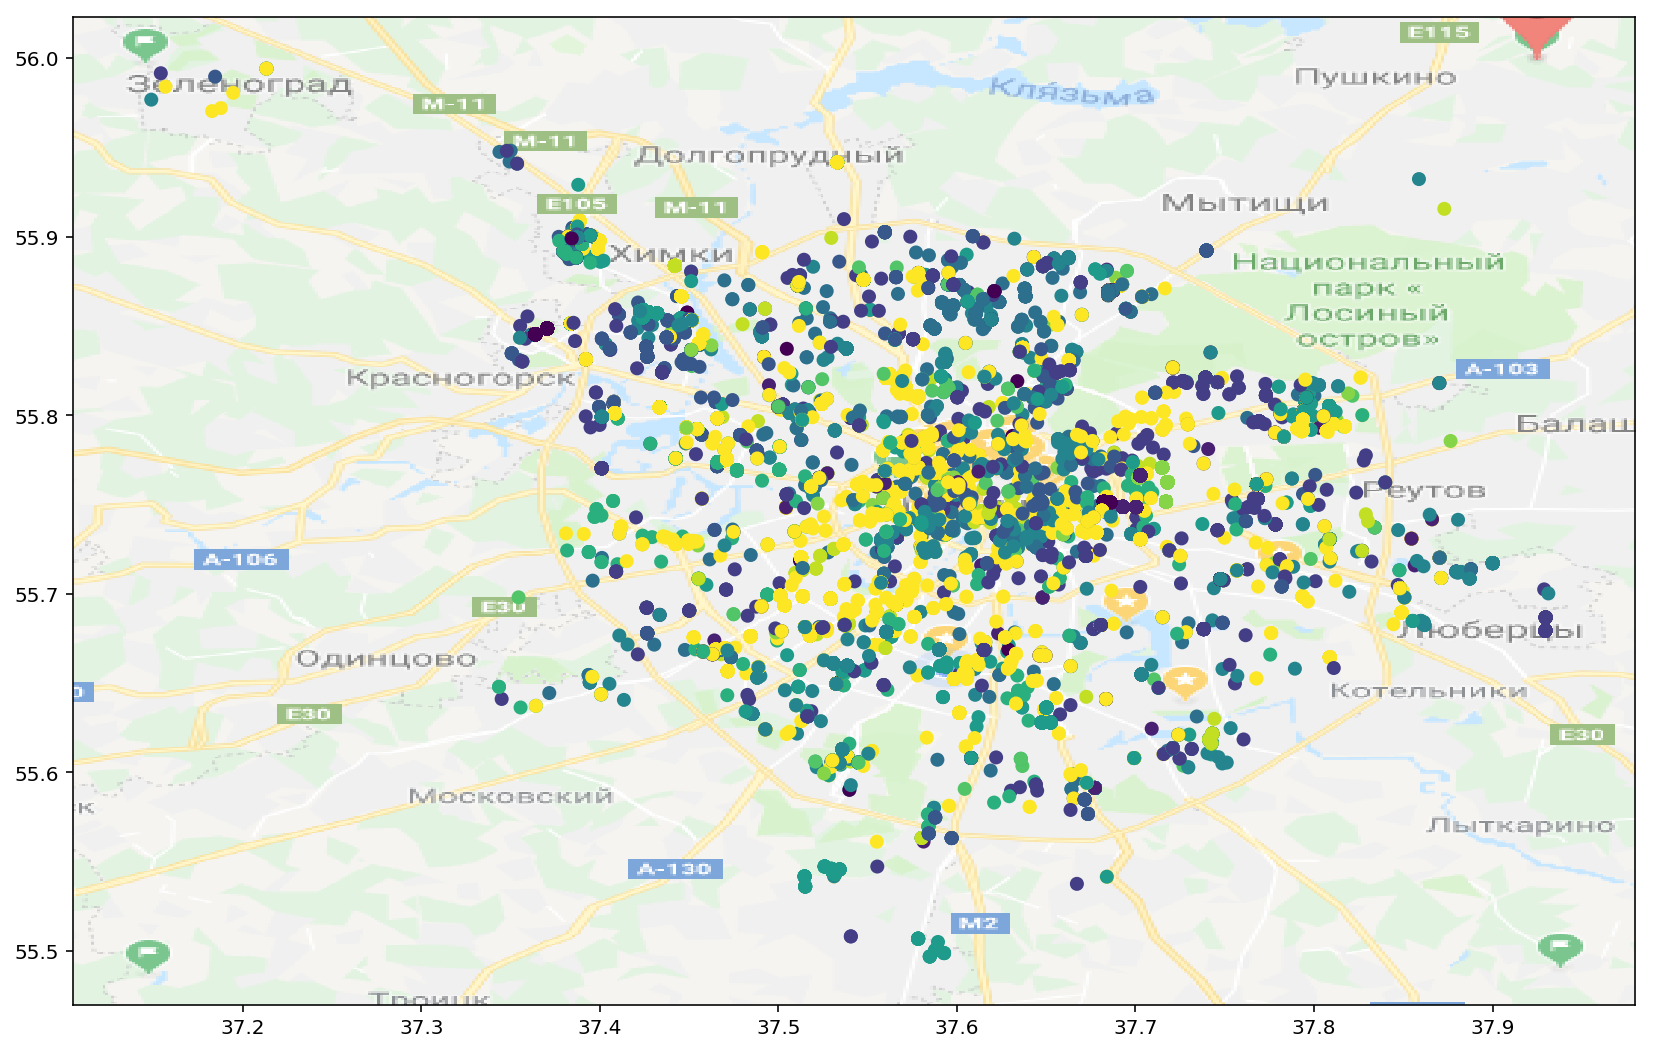

In [166]:
# Построим группы для отрицательных отзывов
matplotlib.rcParams['figure.figsize'] = (14, 12)
plt.scatter(data_bad['x'],data_bad['y'], c=data_bad['max'], zorder=2)
img = imread("map.png")
plt.imshow(img,zorder=0, extent=[37.105, 37.98, 55.47, 56.023 ] )
plt.show()

In [ ]:
# Из полученных графика видно, что для плохих отзывов есть небольшие плотные кластеры по темам и 
# зоны с приемущественной темой отзыва